<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Prediction Of Diabetes
</font>
</h1>

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Introduction
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: left; line-height:200%; font-family:camtasia; font-size:medium">
<font face="camtasia" size=3>
Diabetes is a chronic disease that affects millions of people worldwide and can lead to serious health complications if left untreated. Early diagnosis and prediction of diabetes can help patients receive timely treatment and prevent the onset of complications. On the other hand, XGBoost and CatBoost are powerful machine-learning models that can be used to predict diabetes based on patient data. By providing accurate predictions, these models can help healthcare professionals make informed decisions and improve patient outcomes. Once the model is trained and validated, it can be used to predict the diabetes status of new patients based on their medical data. This can be a valuable tool for healthcare professionals to identify patients who are at risk of developing diabetes and provide them with timely interventions to prevent or manage the disease
</font>
</p>

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Import the required libraries of the project
</font>
</h2>


from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd



<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Reading Dataset
</font>
</h2>

In [4]:
diabetes = pd.read_csv('/content/drive/My Drive/diabetes.csv')
diabetes.head()

NameError: name 'pd' is not defined

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
More details about Dataset
</font>
</h2>

In [ ]:
diabetes.info()

In [ ]:
diabetes.describe()

In [ ]:
# Calculate the correlation matrix
corr_matrix = X_train.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [3]:
#Split dataset
x= diabetes.drop(columns='Diabetes')
y= diabetes['Diabetes']
X_train, X_val, y_train, y_val=train_test_split(x,y, shuffle=True, random_state=12, test_size=0.1)

In [4]:
# Scale the dataset using StandardScaler
scaler = StandardScaler()

X_V = X_val.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


# Define the XGBoost model
model = XGBClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.5],
    'colsample_bylevel' : [0.1, 0.2, 0.3, 0.5],
    'min_child_weight': [1, 3, 5,7],
}


# Perform grid search to find the best hyperparameters
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=kfold, n_jobs=-1)
grid_search.fit(scaled_x_train,y_train)

# Print the best hyperparameters and the corresponding score
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.9579
Best parameters: {'colsample_bylevel': 0.5, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.5}


In [6]:
# setup hyperparameters for xgboost
from xgboost import XGBClassifier
model = XGBClassifier(booster= 'gbtree',learning_rate= 0.1, max_depth= 3, n_estimators=150, colsample_bylevel= 0.5, colsample_bytree=0.3,subsample=0.5,min_child_weight=1)
model.fit(scaled_x_train, y_train)
y_pred = model.predict(scaled_x_val)

# define the evaluation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# evaluate the model on the dataset
n_scores = cross_val_score(model, scaled_x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Accuracy score (training): {0:.3f}".format(model.score(scaled_x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(scaled_x_val, y_val)))

Mean Accuracy: 0.955 (0.005)
Accuracy score (training): 0.971
Accuracy score (validation): 0.958


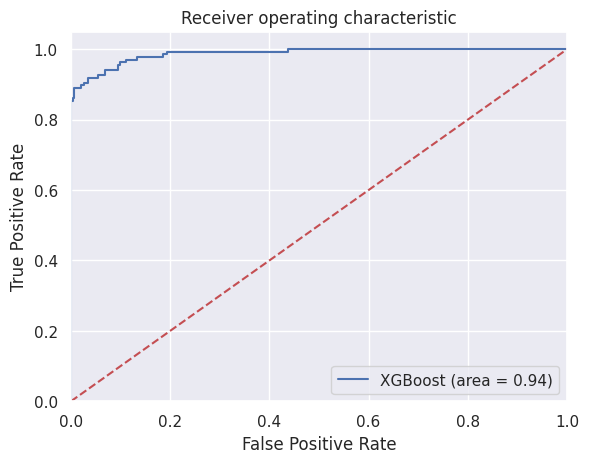

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
GXB_roc_auc = roc_auc_score(y_val, model.predict(scaled_x_val))
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(scaled_x_val)[:,1])
pyplot.figure()
pyplot.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % GXB_roc_auc)
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.savefig('XGBoost_ROC')
pyplot.show()

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn import metrics


print(classification_report(y_val,y_pred))
cm = confusion_matrix(y_val, y_pred)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print('f1 score:', f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       295
           1       0.98      0.89      0.93       136

    accuracy                           0.96       431
   macro avg       0.96      0.94      0.95       431
weighted avg       0.96      0.96      0.96       431

Confusion Matrix : 
 [[292   3]
 [ 15 121]]
Sensitivity :  0.9898305084745763
Specificity :  0.8897058823529411
f1 score: 0.9307692307692308


<Axes: >

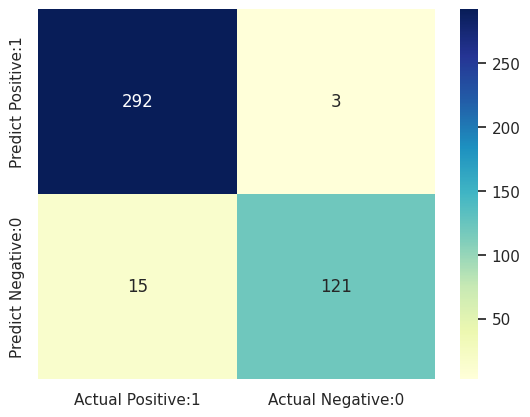

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')